We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns


Importing csv file

In [2]:
df = pd.read_csv('insurance.csv')

#DIR-The dir() function returns all properties and methods of the specified object, without the values

# Overview of Data printing the number of points,features.

In [4]:
print("Number of datpoints", df.shape[0])
print("Number of Features", df.shape[1])
print("Features", df.columns.values)
df.head()

Number of datpoints 1338
Number of Features 7
Features ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Checking Null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Observation:

There are no Missing values in the data set

# Converting dtypes into categories.

In [102]:
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')
df['children'] = df['children'].astype('category')

# Statistical Analysis

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observation:
    The mean and median for the variables age, bmi and children has no difference. It means there could be no outliers.
    The difference between mean and median of changes is high. There could be high extreme values. An the mean has impacted more and it could be seen it is positively skewed.

# EDA --> Univariate Analysis

Text(0.5, 1.0, 'Charges Distribution (Seaborn)')

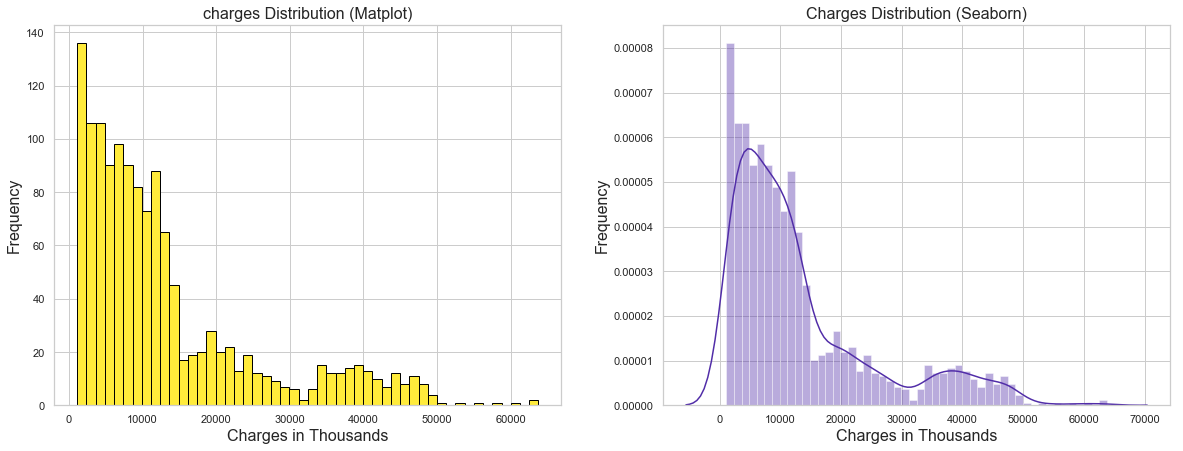

In [8]:
#cHARGES DISTRIBUTION
#setting plot size
plt.figure(figsize=(20,7))
sns.set(style="whitegrid")

#plot using matplotlib
plt.subplot(1,2,1)   #arguments no of rows,columns, and index
plt.hist(df.charges,bins=50,ec="black",color="#FFEB3B")  #ec- edge color
plt.xlabel("Charges in Thousands",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("charges Distribution (Matplot)",fontsize=16)


#plot using seaborn
plt.subplot(1,2,2)
sns.distplot(df.charges,bins=50,color="#512DA8")
plt.xlabel("Charges in Thousands",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Charges Distribution (Seaborn)",fontsize=16)

Observation:

The distribution is right Skewed and few outliers.
The Highest obeservation has observed as 70,000.
Mean of the distribution has observed at 5,000. on an average people are spending 5k on medical insurance.

Text(0.5, 1.0, 'Age Distribution (Seaborn)')

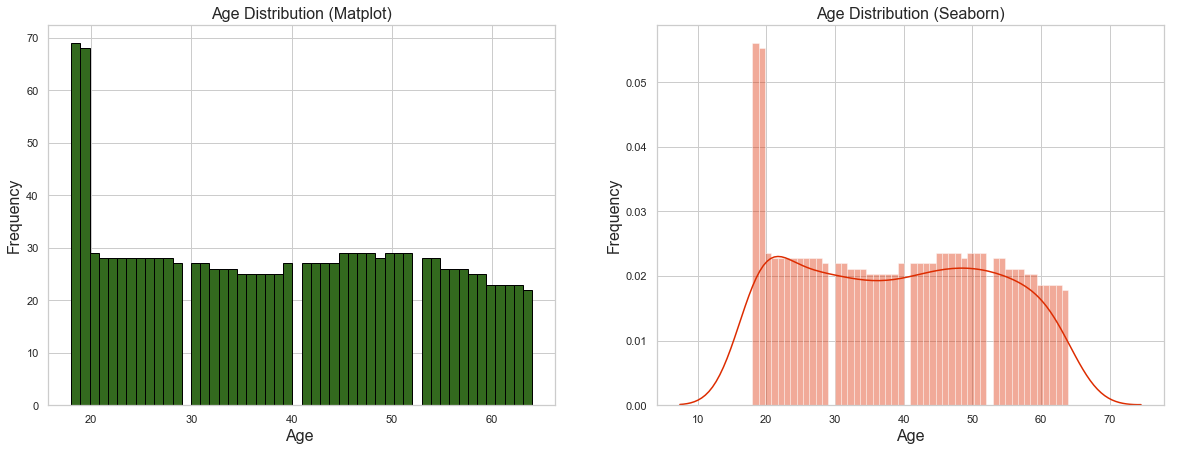

In [9]:
#Age plot 
plt.figure(figsize=(20,7))
sns.set(style="whitegrid")

plt.subplot(1,2,1)
plt.hist(df.age,bins=50,ec="black",color="#33691e") #ec- edge color
plt.xlabel("Age ",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Age Distribution (Matplot)",fontsize=16)


plt.subplot(1,2,2)
sns.distplot(df.age,bins=50,color="#dd2c00")
plt.xlabel("Age",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Age Distribution (Seaborn)",fontsize=16)

Observation:

The distribution has not normally distributed
High number of observations are fall under age of 18 to 20
Less number of observations are noticed between age of 53 to 63
people age from 18 to 50 prefer medical insurance 


Text(0.5, 1.0, 'Children Distribution (Seaborn)')

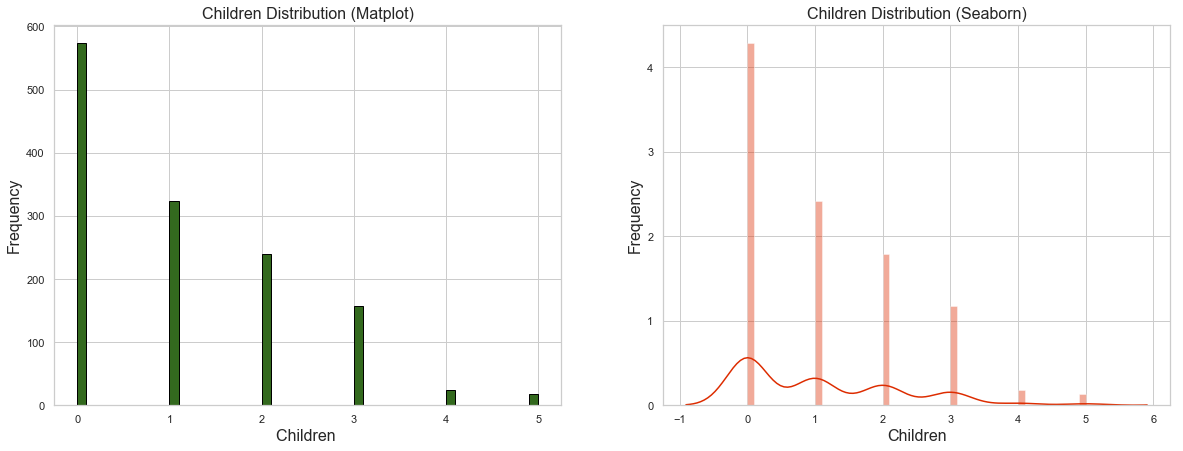

In [10]:
#Children plot 
plt.figure(figsize=(20,7))
sns.set(style="whitegrid")

plt.subplot(1,2,1)
plt.hist(df.children,bins=50,ec="black",color="#33691e") #ec- edge color
plt.xlabel("Children ",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Children Distribution (Matplot)",fontsize=16)


plt.subplot(1,2,2)
sns.distplot(df.children,bins=50,color="#dd2c00")
plt.xlabel("Children",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Children Distribution (Seaborn)",fontsize=16)

Observation:

Most of the observations People having no childern have enrolled for medical insurance.
The next priority observation was people having 1 or 2 kids are paying more on medical insurance.

Text(0.5, 1.0, 'BMI Distribution (Seaborn)')

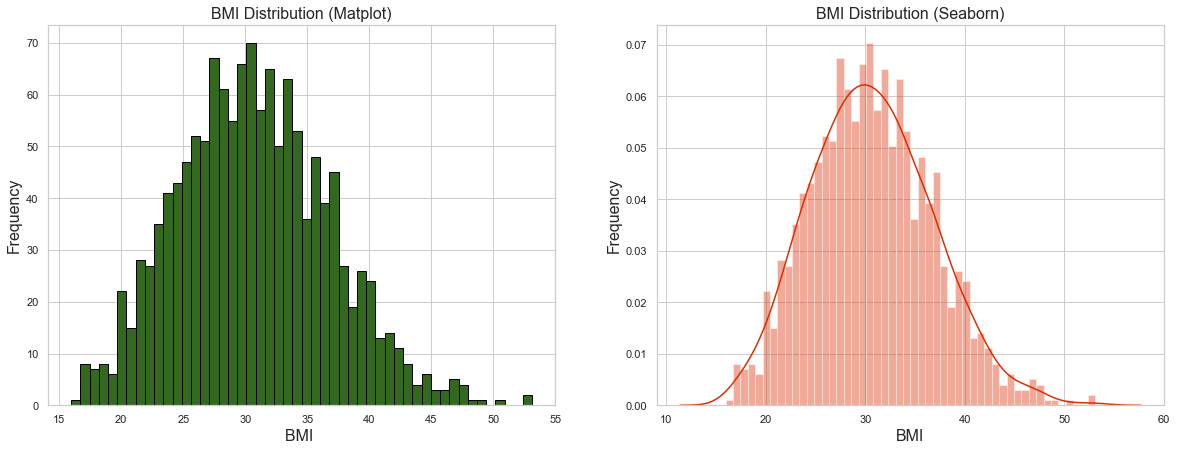

In [11]:
#BMI plot 
plt.figure(figsize=(20,7))
sns.set(style="whitegrid")

plt.subplot(1,2,1)
plt.hist(df.bmi,bins=50,ec="black",color="#33691e") #ec- edge color
plt.xlabel("BMI ",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("BMI Distribution (Matplot)",fontsize=16)


plt.subplot(1,2,2)
sns.distplot(df.bmi,bins=50,color="#dd2c00")
plt.xlabel("BMI",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("BMI Distribution (Seaborn)",fontsize=16)

Observation:
    
    The data has distributed normally
    An average of most of the people have BMI 30

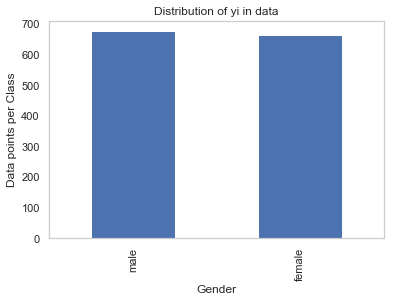

Number of data points in male : 676 ( 50.523 %)
Number of data points in female : 662 ( 49.477 %)


In [12]:
data_class_distribution = df['sex'].value_counts()
data_class_distribution.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in data')
plt.grid()
plt.show()


sorted_yi = np.argsort(-data_class_distribution.values)
for i in sorted_yi:
    print( 'Number of data points in',data_class_distribution.index[i] , ':',data_class_distribution.values[i], '(', np.round((data_class_distribution.values[i]/df.shape[0]*100), 3), '%)')

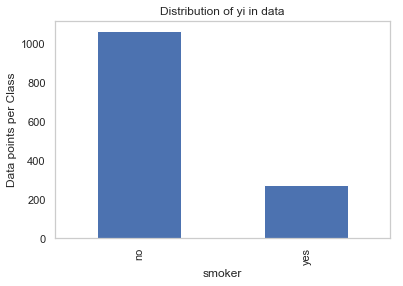

Number of data points in no : 1064 ( 79.522 %)
Number of data points in yes : 274 ( 20.478 %)


In [13]:
data_class_distribution = df['smoker'].value_counts()
data_class_distribution.plot(kind='bar')
plt.xlabel('smoker')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in data')
plt.grid()
plt.show()


sorted_yi = np.argsort(-data_class_distribution.values)
for i in sorted_yi:
    print( 'Number of data points in',data_class_distribution.index[i] , ':',data_class_distribution.values[i], '(', np.round((data_class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Observation:
    
    High priority distribution comes under non smoker. People who dont smoke took medical insurance.

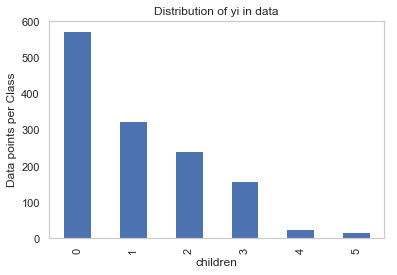

Number of data points in 0 : 574 ( 42.9 %)
Number of data points in 1 : 324 ( 24.215 %)
Number of data points in 2 : 240 ( 17.937 %)
Number of data points in 3 : 157 ( 11.734 %)
Number of data points in 4 : 25 ( 1.868 %)
Number of data points in 5 : 18 ( 1.345 %)


In [14]:
data_class_distribution = df['children'].value_counts()
data_class_distribution.plot(kind='bar')
plt.xlabel('children')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in data')
plt.grid()
plt.show()


sorted_yi = np.argsort(-data_class_distribution.values)
for i in sorted_yi:
    print( 'Number of data points in',data_class_distribution.index[i] , ':',data_class_distribution.values[i], '(', np.round((data_class_distribution.values[i]/df.shape[0]*100), 3), '%)')

In [120]:
data_class_distribution.values[1]

325

In [121]:
df.shape[0]

1338

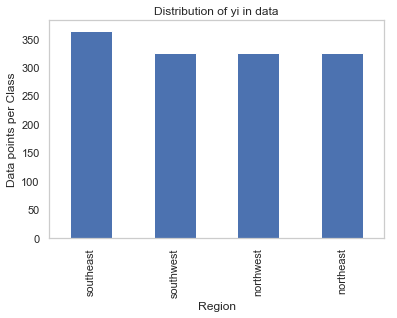

Number of data points in southeast : 364 ( 27.205 %)
Number of data points in southwest : 325 ( 24.29 %)
Number of data points in northwest : 325 ( 24.29 %)
Number of data points in northeast : 324 ( 24.215 %)


In [15]:
#Region plot 
data_class_distribution = df['region'].value_counts()
data_class_distribution.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in data')
plt.grid()
plt.show()


sorted_yi = np.argsort(-data_class_distribution.values)
for i in sorted_yi:
    print( 'Number of data points in',data_class_distribution.index[i] , ':',data_class_distribution.values[i], '(', np.round((data_class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Observation:
    People from all regions are partioned equally. People come from southeast region the distribution is little high.

# Bivariate Analysis

D:\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


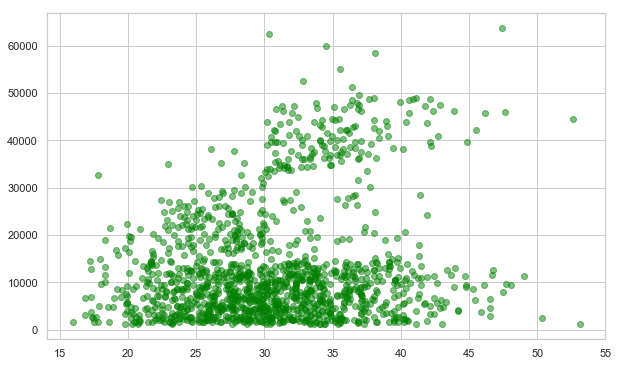

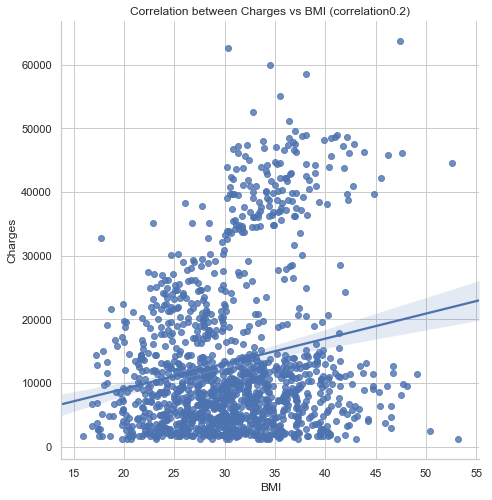

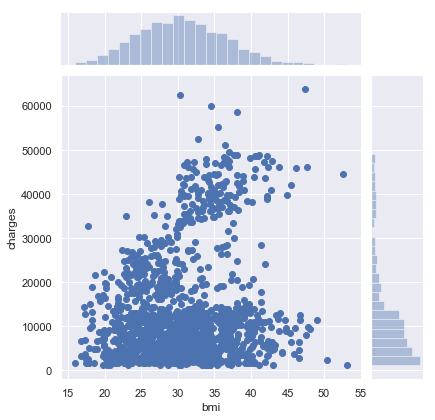

In [16]:

#plot between charges and BMI
df.ND=round((df.charges.corr(df.bmi)),2)


plt.figure(figsize=(10,6))

plt.scatter(x=df.bmi,y=df.charges,color="green",alpha=0.5)
sns.lmplot(x="bmi",y="charges",data=df,size=7)
plt.xlabel("BMI",fontsize=12)
plt.ylabel("Charges",fontsize=12)
plt.title(f"Correlation between Charges vs BMI (correlation{df.ND})",fontsize=12)

#creating the seaborn plot
sns.set() # to change the styling
sns.jointplot(x=df.bmi,y=df.charges)
plt.show()

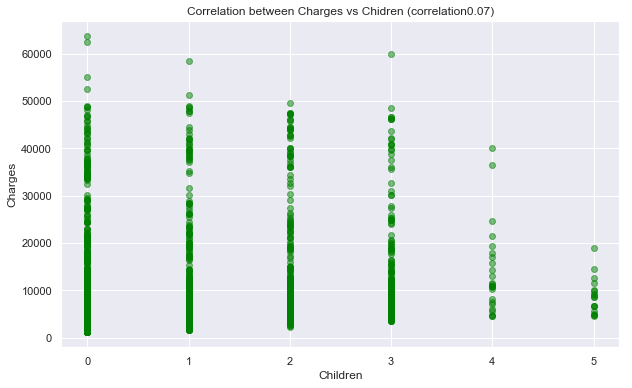

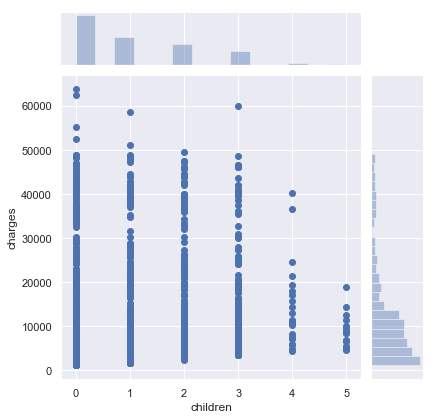

In [17]:
#plot between charges and children
df.ND=round((df.charges.corr(df.children)),2)


plt.figure(figsize=(10,6))

plt.scatter(x=df.children,y=df.charges,color="green",alpha=0.5)
#sns.lmplot(x="chidren",y="charges",data=df,size=7)
plt.xlabel("Children",fontsize=12)
plt.ylabel("Charges",fontsize=12)
plt.title(f"Correlation between Charges vs Chidren (correlation{df.ND})",fontsize=12)

#creating the seaborn plot
sns.set() # to change the styling
sns.jointplot(x=df.children,y=df.charges)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


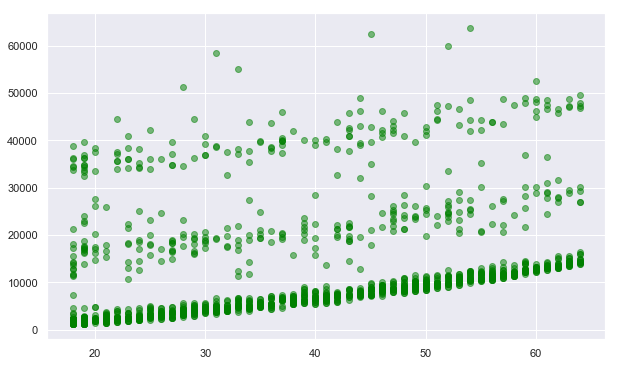

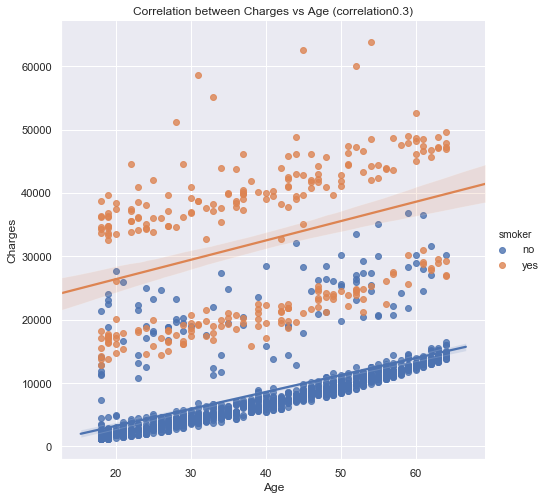

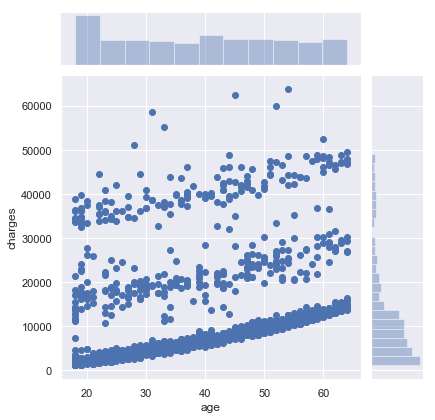

In [125]:
#plot between charges and age
df.ND=round((df.charges.corr(df.age)),2)


plt.figure(figsize=(10,6))

plt.scatter(x=df.age,y=df.charges,color="green",alpha=0.5)
sns.lmplot(x="age",y="charges",data=df,size=7,hue='smoker')
plt.xlabel("Age",fontsize=12)
plt.ylabel("Charges",fontsize=12)
plt.title(f"Correlation between Charges vs Age (correlation{df.ND})",fontsize=12)

#creating the seaborn plot
sns.set() # to change the styling
sns.jointplot(x=df.age,y=df.charges)
plt.show()

In [19]:
df[df['charges']>50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


Correlation Matrix

In [20]:
#corrleation of charges with attributes using pearson method
corr_mat=df.corr()

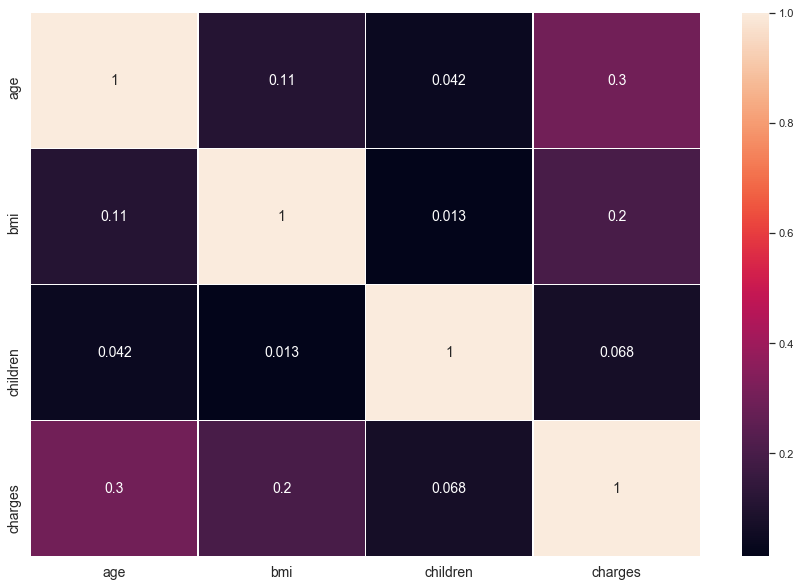

In [21]:
#creating correlation heatmap
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(corr_mat,annot=True,annot_kws={"size":14},linewidth=.5)

Observation:

* correlation between charges and children is moderate. People who are having more children their insurance charges could be high.
* correlation between charges and remaining variables are not quite high.
* correlation between within variables are weak correlated.

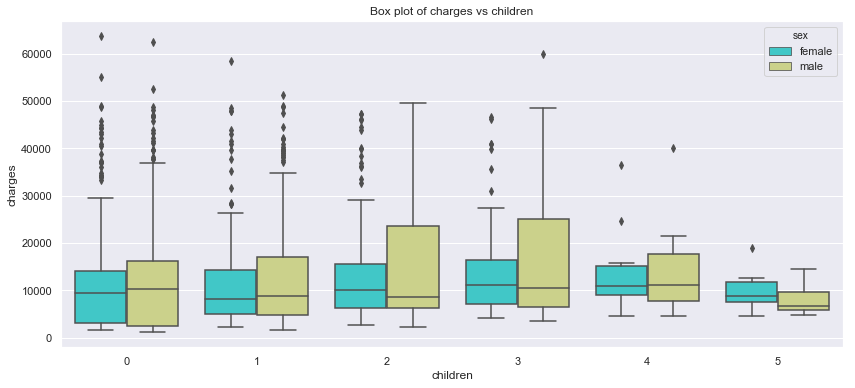

In [22]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

Observations:
    * Most of the men category having kids are paying medical costs.
    * Men who are having 2 or 3 kids paying more medical cost
    * Women who are having kids 5 paying more charges
    * Both men and women who are not having kids paying charges are almost same, dont see much difference as they appear to have similar centres

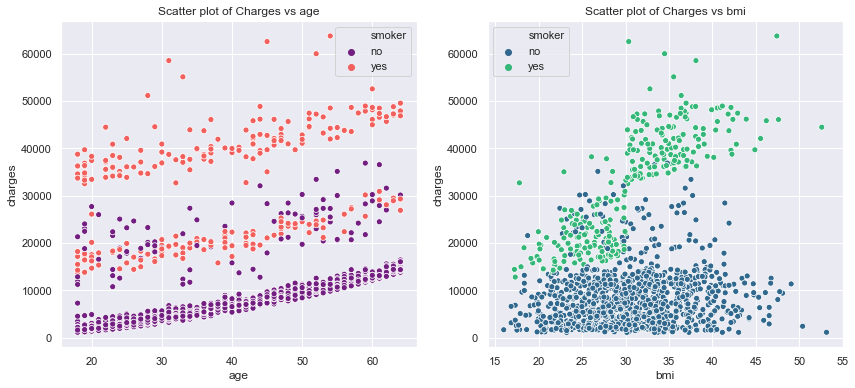

In [23]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');


Observation:

* From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take  1st  and  2nd  slab, for smoker policy start at  2nd  and  3rd  slab.

* Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16 kg/m2  and maximum upto 54 kg/m2

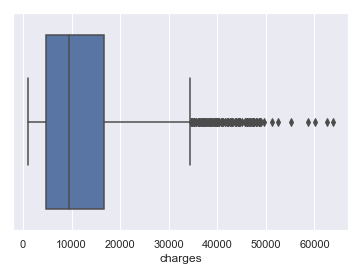

In [28]:
sns.boxplot(df['charges'])

Observation:
* There are few outliers, the charges which are higher than 35k. 
* The higest observation has noted as 65k
* It is right skewed


# Data Preprocessing:

Impemention One hot encoding Techniques

In [66]:
sex_ = df[["sex"]]
sex_ = pd.get_dummies(sex_, drop_first =True)
sex_.head()

,sex_male
0,0
1,1
2,1
3,1
4,1


In [114]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [67]:
region_ = df[["region"]]
region_ = pd.get_dummies(region_, drop_first =True)
region_.head()

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [68]:
smoker_ = df[["smoker"]]
smoker_ = pd.get_dummies(smoker_, drop_first =True)
smoker_.head()

,smoker_yes
0,1
1,0
2,0
3,0
4,0


In [105]:
children_ = df[["children"]]
children_ = pd.get_dummies(children_, drop_first =True)
children_.head()

,children_1,children_2,children_3,children_4,children_5
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [106]:
data_ = pd.concat([df,smoker_,region_,sex_,children_], axis=1)

In [107]:
data_.head()

,age,sex,bmi,children,smoker,region,charges,smoker_yes,children_1,children_2,children_3,children_4,children_5,sex_male,children_1,children_2,children_3,children_4,children_5
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,0,0,0,0,0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0,0,0,1,1,0,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0,1,0,0,1,0,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0,0,0,0,1,0,0,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0,0,0,0,1,0,0,0,0,0


In [108]:
data_.drop(["sex"], axis = 1, inplace = True)

In [109]:
data_.drop(["smoker","region"], axis = 1, inplace = True)

In [110]:
data_.drop(["children"], axis = 1, inplace = True)

In [111]:
data_.head()

,age,bmi,charges,smoker_yes,children_1,children_2,children_3,children_4,children_5,sex_male,children_1,children_2,children_3,children_4,children_5
0,19,27.900,16884.92400,1,0,0,0,0,0,0,0,0,0,0,0
1,18,33.770,1725.55230,0,1,0,0,0,0,1,1,0,0,0,0
2,28,33.000,4449.46200,0,0,0,1,0,0,1,0,0,1,0,0
3,33,22.705,21984.47061,0,0,0,0,0,0,1,0,0,0,0,0
4,32,28.880,3866.85520,0,0,0,0,0,0,1,0,0,0,0,0


In [112]:
data_.shape

(1338, 15)

# Applying Log on Charges to follow normal distribution

In [115]:
data_["charges"]= np.log(data_['charges'].values)

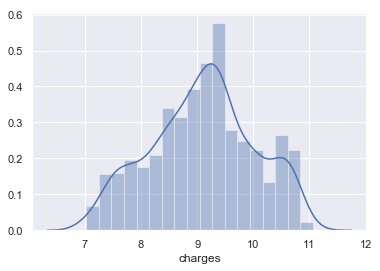

In [116]:
sns.distplot(data_["charges"])

# Train Test Split

In [117]:
from sklearn.model_selection import train_test_split
X = data_.drop('charges',axis=1) # Independet variable
y = data_['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

# Model Building

In [118]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Model Evaluation

In [119]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.19091184782940124
R square obtain for scikit learn library is : 0.7753134811210364


# Model Validation

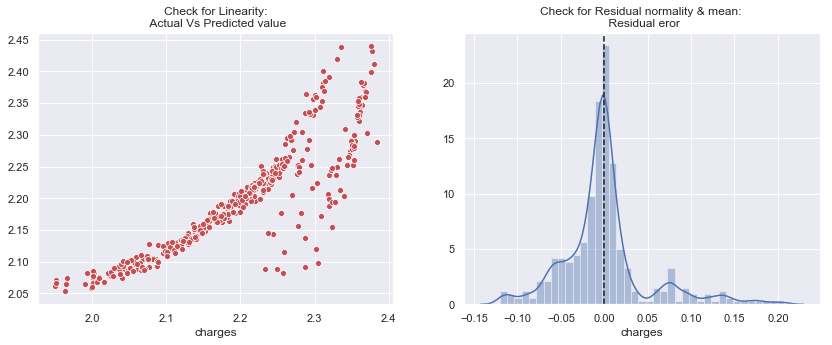

In [98]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

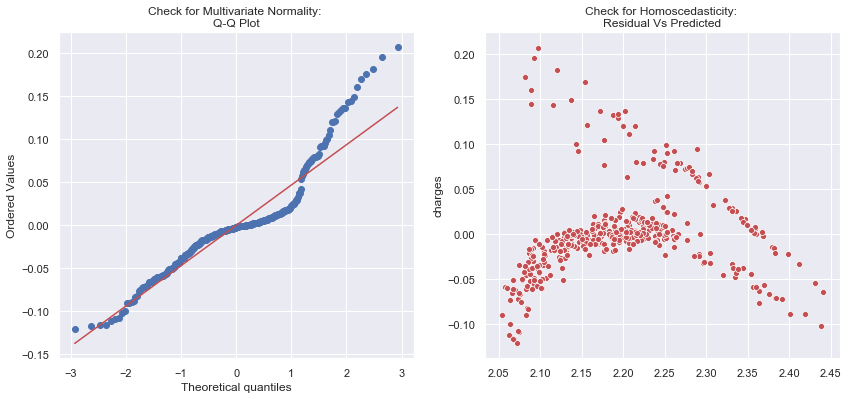

In [99]:
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [100]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.359489725938407

The model assumption linear regression as follows

* In our model the actual vs predicted plot is curve so linear assumption fails
* The residual mean is zero and residual error plot right skewed
* Q-Q plot shows as value log value greater than 1.5 trends to increase
* The plot is exhibit heteroscedastic, error will incease after certian point.
* Variance inflation factor value is less than 5, so no multicollearity.

In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following

* Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value
* The residual error plot should be normally distributed.
* The mean of residual error should be 0 or close to 0 as much as possible
* The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
* Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation.  VIF=11−R2 , If VIF >1 & VIF <5 moderate correlation, VIF > 5 critical level of multicollinearity.
* Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.